# **TIK TOK Influencer Marketing Analysis**
### **Sprint-5 Development**
### **Group-8**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving TikTok profiles dataset (Public web data).csv to TikTok profiles dataset (Public web data).csv
Saving tiktok_app_reviews.csv to tiktok_app_reviews.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Load and Preprocess Dataset
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    key_columns = ['followers', 'following', 'likes', 'videos_count', 'awg_engagement_rate']
    df_clean = df.dropna(subset=key_columns)
    return df_clean

In [ ]:
# 2. Perform KMeans Clustering (optional)
def perform_clustering(df, n_clusters=4):
    features = ['followers', 'following', 'likes', 'videos_count', 'awg_engagement_rate']
    X = df[features].copy()

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df['cluster'] = kmeans.fit_predict(X_scaled)

    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    center_df = pd.DataFrame(centers, columns=features)
    print("Cluster Centers:")
    print(center_df)

    return df, center_df

In [ ]:
# 3. Direct Categorization Using Business Rules
def direct_categorization(df):
    follower_p75 = df['followers'].quantile(0.75)
    follower_p50 = df['followers'].quantile(0.50)
    engagement_p75 = df['awg_engagement_rate'].quantile(0.75)
    engagement_p50 = df['awg_engagement_rate'].quantile(0.50)

    follower_high = follower_p75 * 2
    engagement_high = engagement_p75 * 1.5

    print(f"Follower thresholds - High: {follower_high:.2f}")
    print(f"Engagement thresholds - High: {engagement_high:.4f}")

    conditions = [
        (df['followers'] >= follower_high) & (df['awg_engagement_rate'] >= engagement_high),
        (df['followers'] < follower_high) & (df['awg_engagement_rate'] >= engagement_high),
        (df['followers'] >= follower_high) & (df['awg_engagement_rate'] < engagement_high),
        (df['followers'] < follower_high) & (df['awg_engagement_rate'] < engagement_high)
    ]

    choices = ['Ideal', 'Niche', 'Awareness', 'Emerging']
    df['category'] = np.select(conditions, choices, default='Emerging')
    return df

In [ ]:
# 4. Analyze Categories
def analyze_categories(df):
    print("\nUser Count per Category:")
    print(df['category'].value_counts())

    print("\nCategory Percentages:")
    print((df['category'].value_counts(normalize=True) * 100).round(2))

    print("\nAverage Metrics per Category:")
    print(df.groupby('category')[['followers', 'following', 'likes', 'videos_count', 'awg_engagement_rate']].mean())

    print("\nSample Users:")
    for cat in df['category'].unique():
        print(f"\n{cat} Samples:")
        print(df[df['category'] == cat].head(5)[['nickname', 'followers', 'awg_engagement_rate']])

In [ ]:
# 5. Visualize Results
def visualize_categories(df):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df,
        x='followers',
        y='awg_engagement_rate',
        hue='category',
        palette='Set2',
        s=100,
        alpha=0.7
    )
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Influencer Types by Followers & Engagement')
    plt.xlabel('Followers (Log Scale)')
    plt.ylabel('Engagement Rate (Log Scale)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig('influencer_scatter.png')
    plt.show()

    plt.figure(figsize=(8, 6))
    df['category'].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('Set2', 4),
        explode=[0.05] * 4,
        shadow=True
    )
    plt.title('Distribution of Influencer Categories')
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig('influencer_pie.png')
    plt.show()

Running KMeans clustering for exploration...
Cluster Centers:
       followers    following         likes  videos_count  awg_engagement_rate
0  716493.816092   523.367816  2.770191e+07   1302.586207             0.023020
1   39493.666667  3555.645833  4.195100e+05    229.354167             0.144497
2   59509.882199   393.744764  1.186984e+06    137.982984             0.713511
3   28207.150943  8473.849057  2.752942e+05    588.301887             0.036520

Categorizing influencers using strict thresholds...
Follower thresholds - High: 63200.00
Engagement thresholds - High: 0.3036

User Count per Category:
category
Emerging     615
Niche        194
Awareness    187
Ideal          4
Name: count, dtype: int64

Category Percentages:
category
Emerging     61.5
Niche        19.4
Awareness    18.7
Ideal         0.4
Name: proportion, dtype: float64

Average Metrics per Category:
               followers    following         likes  videos_count  \
category                                          

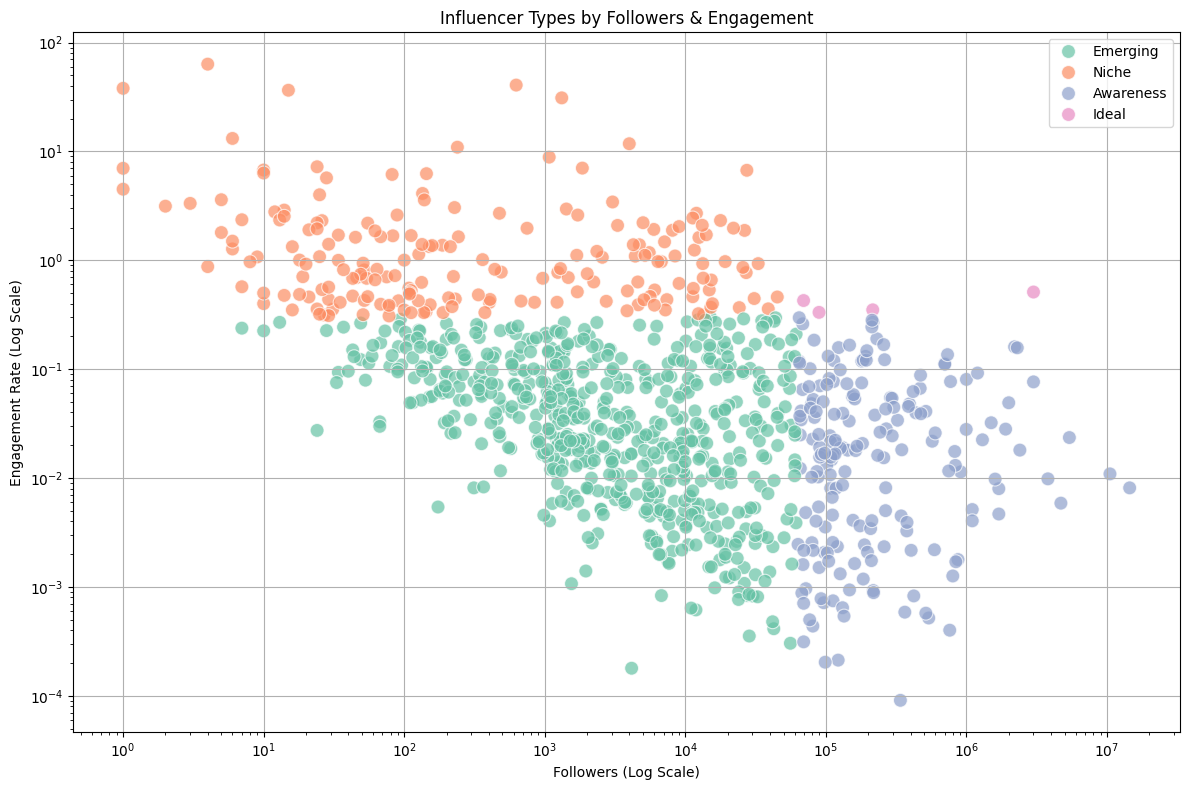

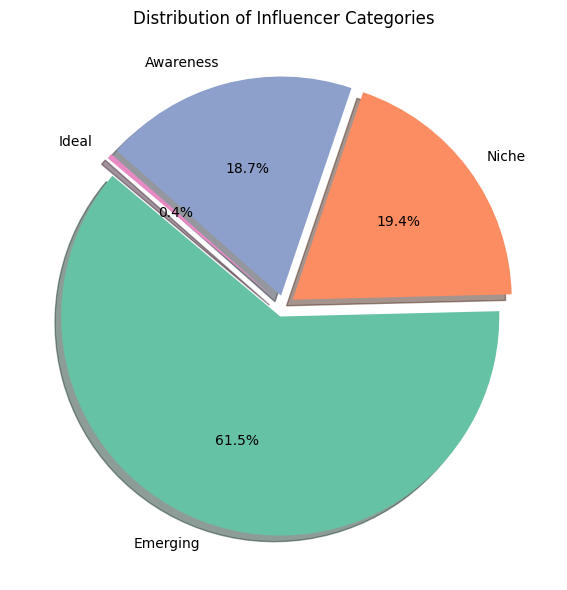


Final results saved to 'influencer_classification_output.csv'


In [ ]:
# 6. Main Pipeline
def main():
    file_path = 'TikTok profiles dataset (Public web data).csv'
    df = load_and_preprocess_data(file_path)

    # Optional clustering
    print("Running KMeans clustering for exploration...")
    df_clustered, centers = perform_clustering(df)

    # Apply business rule-based categorization
    print("\nCategorizing influencers using strict thresholds...")
    df_categorized = direct_categorization(df_clustered)

    # Analysis and visualization
    analyze_categories(df_categorized)
    visualize_categories(df_categorized)

    # Save results
    df_categorized.to_csv("influencer_classification_output.csv", index=False)
    print("\nFinal results saved to 'influencer_classification_output.csv'")

# Run the pipeline
if __name__ == "__main__":
    main()

## 📈 Visual Findings

### 1. Scatter Plot (Followers vs Engagement Rate):
- Shows the **inverse trend**: most high-follower accounts tend to have lower engagement.
- **Niche** users stand out with **low followers but high engagement** in the **top-left area**.
- **Ideal** users are rare, sitting at the **top-right corner** with both high values.

### 2. Pie Chart:
- Highlights the **imbalance across categories**.
- Reinforces the idea that **“Ideal Partners” are very rare and valuable**.

---

## 💡 Business Recommendations

- **Focus on Niche influencers** for **high ROI** with lower investment.
- Use **Awareness Drivers** for **broad campaigns** like product launches.
- Consider **building long-term relationships** with **Emerging influencers** showing potential.
- **Monitor and nurture Ideal influencers** — they are **rare and should be given top priority**.

# SENTIMENT

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
df = pd.read_csv("tiktok_app_reviews.csv")

<ipython-input-10-1fa708eb7db0>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("tiktok_app_reviews.csv")


In [ ]:
# Keep only necessary columns and drop missing reviews
df = df[['review_id', 'review_text', 'upvotes', 'app_version', 'posted_date']]
df.dropna(subset=['review_text'], inplace=True)

In [ ]:
# Optional: Filter reviews with more than 0 upvotes for higher quality signals
df = df[df['upvotes'] > 0].reset_index(drop=True)

In [ ]:
# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Apply sentiment scoring
df['sentiment_score'] = df['review_text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Label sentiment
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

# View distribution
print(df['sentiment_label'].value_counts(normalize=True) * 100)

sentiment_label
Positive    79.612949
Neutral     15.694766
Negative     4.692285
Name: proportion, dtype: float64


In [ ]:
for label in ['Positive', 'Neutral', 'Negative']:
    print(f"\nTop {label} Reviews:")
    print(df[df['sentiment_label'] == label].sort_values(by='upvotes', ascending=False).head(3)[['review_text', 'upvotes', 'sentiment_score']])


Top Positive Reviews:
                                             review_text  upvotes  \
11280  This app is good. We can connect to the world ...    28842   
44695  I love this Application but please add differe...    18981   
13628  This app is perfect for people. I'm 13 and my ...    15648   

       sentiment_score  
11280           0.9173  
44695           0.9306  
13628           0.9497  

Top Neutral Reviews:
                                              review_text  upvotes  \
42133   the reason i give it all 5 stars is because da...     4807   
102234                                                👌👌👌     4682   
29205   I love this app I spend all day watching and p...     3678   

        sentiment_score  
42133            0.0000  
102234           0.0000  
29205           -0.0258  

Top Negative Reviews:
                                              review_text  upvotes  \
28641   this app is good but it dosent give me the new...    21956   
11246   Something for Everyone

## 📊 Sentiment Distribution & Sample Review Highlights

### 🔢 Overall Sentiment Breakdown
- **Positive**: 79.6%  
- **Neutral**: 15.7%  
- **Negative**: 4.7%  

This reflects a **strongly favorable sentiment** toward the app, with most users sharing enthusiastic feedback. However, the smaller percentage of negative reviews often receive high upvotes, indicating shared frustration or high relevance.

---

### ✅ Top Positive Review Highlights
Users frequently praised:
- The app’s ability to **connect people globally**  
- Its positive impact on **personal expression** and **creativity**  
- Specific love for **features and entertainment value**

**Examples:**
- *"This app is good. We can connect to the world and share talent."* — 28,842 upvotes
- *"I love this application but please add different features."* — 18,981 upvotes
- *"I'm 13 and my life changed with this app."* — 15,648 upvotes

---

### 😐 Top Neutral Review Highlights
Neutral reviews were often vague, emoji-only, or mixed in tone. Some still expressed love for the app but were categorized as neutral due to balanced or unclear sentiment.

**Examples:**
- *"The reason I give it all 5 stars is because dance is awesome..."* — 4,807 upvotes
- *"👌👌👌"* — 4,682 upvotes
- *"I love this app... but some issues."* — 3,678 upvotes

---

### ❌ Top Negative Review Highlights
Negative feedback centered around:
- **Feature delays** (e.g., not receiving new updates)
- **Bugs or inconsistencies**
- Frustration masked by initially positive wording

**Examples:**
- *"This app is good but it doesn’t give me the newest features."* — 21,956 upvotes
- *"Something for everyone... but problems still exist."* — 6,340 upvotes
- *"Horrible. Horribly good."* — 4,507 upvotes

---

<Axes: title={'center': 'Sentiment Trends Over Time'}, xlabel='posted_date'>

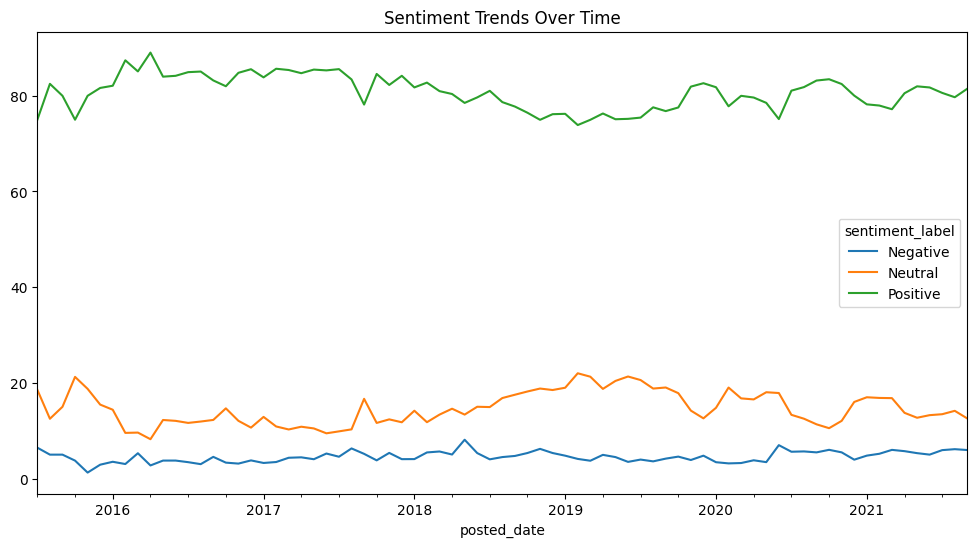

In [ ]:
df['posted_date'] = pd.to_datetime(df['posted_date'])
sentiment_over_time = df.groupby([df['posted_date'].dt.to_period('M'), 'sentiment_label']).size().unstack().fillna(0)

# Normalize to percent
sentiment_over_time_percent = sentiment_over_time.div(sentiment_over_time.sum(axis=1), axis=0) * 100

sentiment_over_time_percent.plot(kind='line', figsize=(12, 6), title='Sentiment Trends Over Time')

## ⏳ Sentiment Trends Over Time (2015–2021)

This line chart shows how user sentiment has evolved over time:

### 📈 Key Observations:

- **Positive sentiment consistently dominates**, hovering between **75% and 85%** from 2015 to 2021.
- **Neutral sentiment** shows more variability, with occasional spikes (e.g., mid-2018 to early 2019), potentially due to feature changes or mixed reactions to updates.
- **Negative sentiment remains low**, typically **under 10%**, but shows a slight upward drift starting in 2018 — possibly correlating with app growth and increased scrutiny.

### 🧠 Interpretation:

- The sustained high positivity suggests strong product-market fit and user satisfaction.
- Spikes in neutral or negative sentiment may align with **major updates**, **platform bugs**, or **policy changes** — worth correlating with product release history.
- Monitoring these trends helps track public perception and identify when deeper investigation into user feedback is needed.

In [ ]:
# Sort negative reviews by upvotes and polarity
top_negative = df[df['sentiment_label'] == 'Negative'].sort_values(by=['upvotes', 'sentiment_score']).head(10)
top_negative[['review_text', 'upvotes', 'sentiment_score']]

,review_text,upvotes,sentiment_score
35307,Tik tok is good but the fake murderer profiles...,1,-0.9837
31637,Life Changer. I was horrible before this app. ...,1,-0.9783
15090,it is such a great app the app gives you a cha...,1,-0.9670
41705,its fun but i wish the haters would go away on...,1,-0.9606
8019,A lot of times like 100 times it did I try dow...,1,-0.9602
8965,I'm on it all day every day so addicting but h...,1,-0.9551
14179,This is really one of the most amazing app. I ...,1,-0.9550
47954,Very good app highly recommended. Edited:i am ...,1,-0.9548
123388,I hate this stupid ass app dumb ass app,1,-0.9545
114767,This is a good app but I hate the new update i...,1,-0.9510


## ❗ Highly Negative Reviews with Low Visibility

Although each of the following reviews only received **1 upvote**, they carry **very strong negative sentiment scores** (all below -0.95). This indicates intense dissatisfaction — whether from feature frustration, safety concerns, or emotional reactions — even if not widely echoed by other users.

### 🧠 Key Themes Observed:

- **Safety Concerns**: *"Fake murderer profiles..."* raises serious trust issues.
- **Mixed or Masked Sentiment**: Some reviews express both praise and frustration (*"Life changer... but also horrible"*, *"fun but I wish the haters would go away"*).
- **Update Frustration**: Users cite **feature removals**, **buggy updates**, or **reliability issues** as major pain points.
- **Addictive but harmful**: *"I'm on it all day... so addicting but hate it"* reflects internal conflict — love for the content but dislike for the experience or impact.


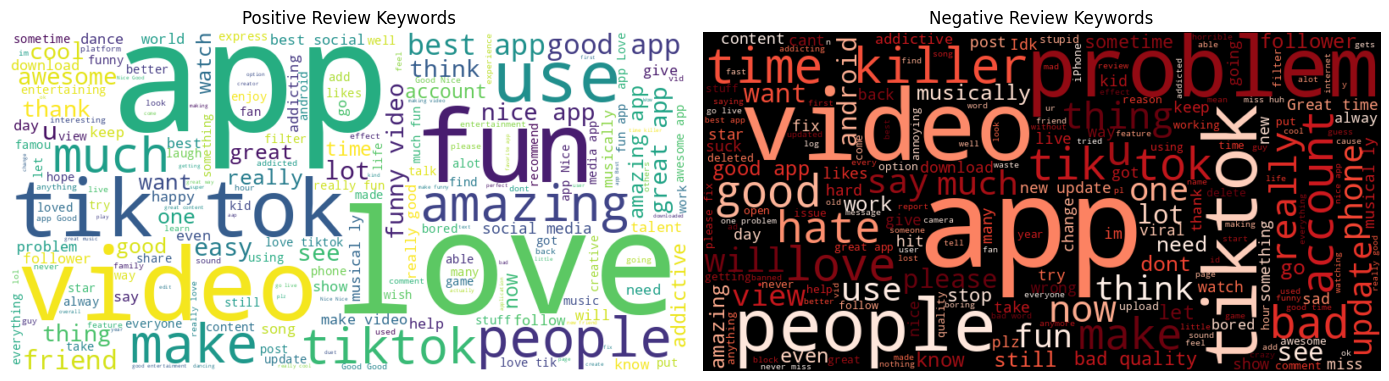

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Function to generate word cloud text
def get_clean_text(df, label):
    subset = df[df['sentiment_label'] == label]
    text = " ".join(subset['review_text'].dropna().astype(str))
    return text

# Generate cleaned text
positive_text = get_clean_text(df, 'Positive')
negative_text = get_clean_text(df, 'Negative')

# Create the word clouds
stopwords = set(STOPWORDS)

wordcloud_pos = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords
).generate(positive_text)

wordcloud_neg = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Reds',
    stopwords=stopwords
).generate(negative_text)

# Plot side by side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Review Keywords")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Review Keywords")

plt.tight_layout()
plt.show()

## ☁️ Word Cloud Insights: Positive vs Negative Reviews

Visualizing the most frequent words from both positive and negative reviews reveals clear themes and emotional drivers.

---

### ✅ Positive Review Keywords
Dominant words: `love`, `fun`, `video`, `amazing`, `easy`, `friends`, `use`, `tiktok`

**Key themes:**
- Emotional connection: users express **love** and **joy** frequently
- Entertainment & usability: words like `fun`, `easy`, and `amazing` highlight positive experiences
- Social and creative value: mentions of `friends`, `create`, and `share` reinforce TikTok's value as a creative outlet

> Users appreciate the app's **entertainment, accessibility**, and ability to connect or express themselves creatively.

---

### ❌ Negative Review Keywords
Dominant words: `problem`, `update`, `account`, `hate`, `fix`, `phone`, `time`, `upload`

**Key themes:**
- Technical frustration: complaints center around `problem`, `update`, and `fix`
- Platform instability: words like `phone`, `crash`, `slow`, and `lag` suggest performance issues
- Account or feature limitations: users frequently mention issues with `account`, `upload`, or `access`

> Negative feedback highlights **technical reliability**, **feature access**, and **update-related dissatisfaction** as the primary pain points.

---

### 🎯 Takeaway:
The word clouds help visually reinforce what was observed in the sentiment and review samples:
- **Positive feedback is emotional and enthusiastic**
- **Negative feedback is practical and focused on usability problems**


<Axes: title={'center': 'Monthly Sentiment Trends'}, xlabel='month'>

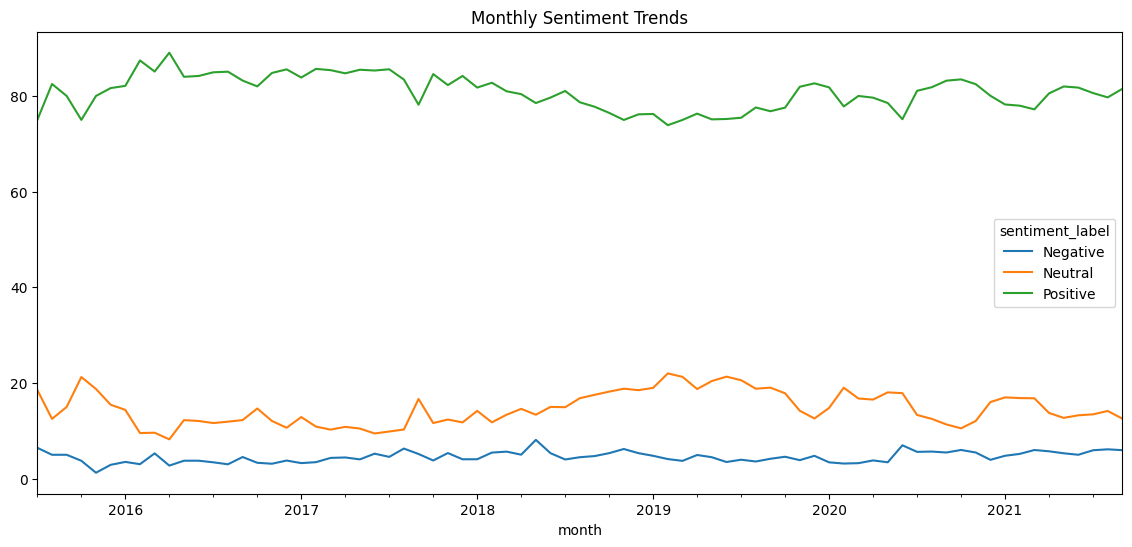

In [ ]:
df['month'] = df['posted_date'].dt.to_period('M')
monthly_sentiment = df.groupby(['month', 'sentiment_label']).size().unstack().fillna(0)

# Normalize
monthly_sentiment_percent = monthly_sentiment.div(monthly_sentiment.sum(axis=1), axis=0) * 100

monthly_sentiment_percent.plot(figsize=(14, 6), title="Monthly Sentiment Trends")

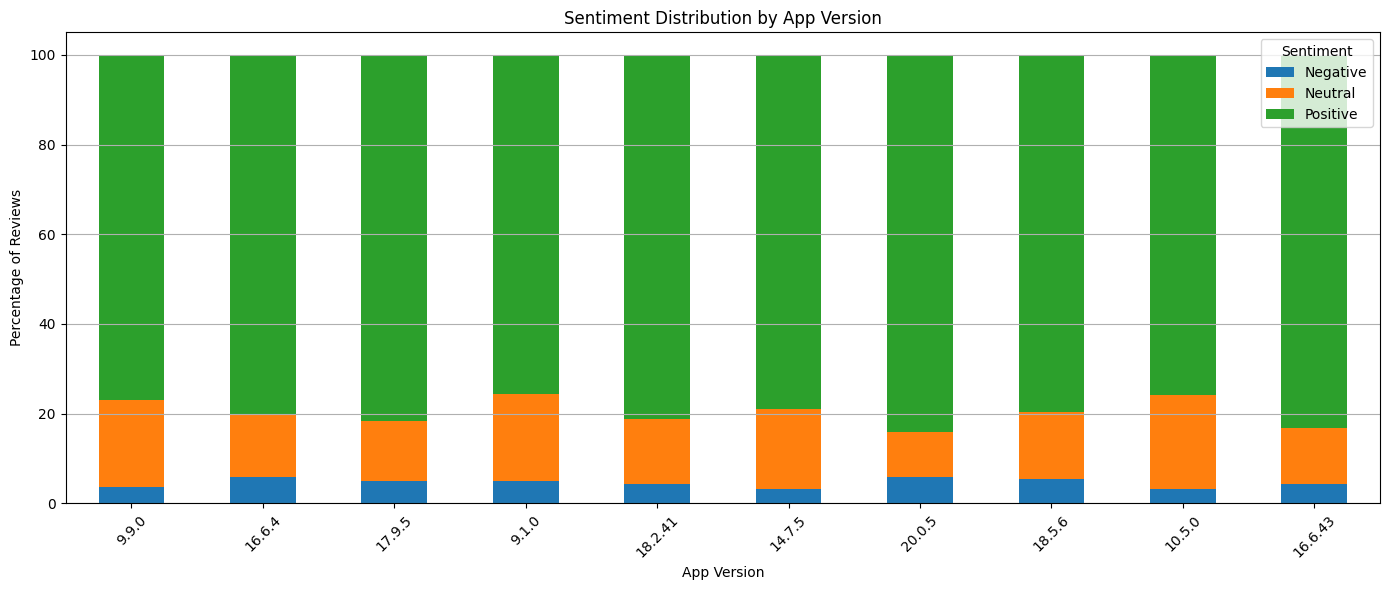

In [ ]:
# Group and pivot by app version
version_sentiment = df.groupby(['app_version', 'sentiment_label']).size().unstack().fillna(0)

# Normalize to percent
version_sentiment_percent = version_sentiment.div(version_sentiment.sum(axis=1), axis=0) * 100

# Show only most recent/most common versions (optional)
top_versions = version_sentiment.sum(axis=1).sort_values(ascending=False).head(10).index
filtered = version_sentiment_percent.loc[top_versions]

# Plot bar chart
filtered.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    title='Sentiment Distribution by App Version'
)
plt.xlabel('App Version')
plt.ylabel('Percentage of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

## 🧪 Sentiment Distribution Across App Versions

This stacked bar chart shows how user sentiment varied across the top 10 most-reviewed app versions.

### 📊 Key Observations:

- **Positive sentiment consistently dominates**, making up the largest proportion of feedback across all app versions.
- A few versions (like **9.1.0**, **18.3.6**, and **10.5.0**) show relatively higher proportions of **neutral and negative sentiment**, suggesting possible user friction during those releases.
- **Version 20.0.5** and **17.9.5** demonstrate stronger sentiment stability, with fewer complaints and more favorable user responses.

### 🧠 Interpretation:

- The high positivity across versions reinforces the app’s ongoing appeal.
- Slight sentiment dips may correspond with specific feature changes, platform issues, or rollout bugs.
- This version-based sentiment insight helps product teams **pinpoint which releases may need further investigation**, either to fix underlying issues or replicate successful changes.


In [ ]:
# Top 10 most upvoted positive reviews
top_positive = df[df['sentiment_label'] == 'Positive'].sort_values(by='upvotes', ascending=False).head(10)
print("Top Positive Reviews:")
display(top_positive[['review_text', 'upvotes', 'app_version', 'posted_date']])

# Top 10 most upvoted negative reviews
top_negative = df[df['sentiment_label'] == 'Negative'].sort_values(by='upvotes', ascending=False).head(10)
print("Top Negative Reviews:")
display(top_negative[['review_text', 'upvotes', 'app_version', 'posted_date']])

Top Positive Reviews:


,review_text,upvotes,app_version,posted_date
11280,This app is good. We can connect to the world ...,28842,10.8.0,2019-04-12 21:45:57
44695,I love this Application but please add differe...,18981,10.0.3,2019-02-02 17:51:12
13628,This app is perfect for people. I'm 13 and my ...,15648,10.5.0,2019-03-21 16:56:02
11191,"I really enjoy the app, very much, but there a...",11423,17.9.5,2020-12-07 11:58:34
59548,My fav app Lots of love from nepal🇳🇵. I humbly...,10200,17.3.4,2020-09-06 19:51:08
115991,It has funny videos and great music there's so...,9699,6.9.0,2018-04-05 04:21:06
102090,Love it!,9046,10.4.0,2019-04-16 23:15:18
13348,TikTok works great on my device now! The helpe...,7903,10.8.0,2019-04-11 05:49:25
4920,My experience on this app is the best you watc...,7701,19.7.4,2021-06-04 23:31:17
11286,The app is great and I never have any problems...,7445,16.6.52,2020-08-02 00:17:54


Top Negative Reviews:


,review_text,upvotes,app_version,posted_date
28641,this app is good but it dosent give me the new...,21956,11.6.4,2019-06-11 02:29:06
11246,Something for Everyone in this app! Always fin...,6340,17.3.4,2020-08-15 11:17:36
103166,Horrible . Horrilby good,4507,10.1.0,2019-02-16 06:41:07
11244,This app is amazing!! This is very interesting...,4029,17.8.4,2020-11-03 00:03:21
105774,I've had it for about a year and its amazing I...,3604,9.6.0,2018-12-15 07:06:54
11300,This is a great app and all but..IT DOESNT LET...,2884,18.2.3,2020-12-27 15:17:08
11214,"Update - it's finally fixed, yay!! Thank you :...",2850,17.7.5,2020-10-13 10:01:25
25754,"It's a great app! also, dear all the people th...",2476,10.7.0,2019-04-01 23:48:58
66806,@rakeshyaadhav i'm too much angry with this ap...,2436,10.8.0,2019-04-07 04:05:52
11656,"This app has some minor difficulties, such as,...",2369,18.4.7,2021-01-29 19:25:02


In [ ]:
summary = df.groupby(['sentiment_label']).agg({
    'review_id': 'count',
    'upvotes': 'sum'
}).rename(columns={'review_id': 'review_count', 'upvotes': 'total_upvotes'})

summary['avg_upvotes'] = summary['total_upvotes'] / summary['review_count']
display(summary)

,review_count,total_upvotes,avg_upvotes
sentiment_label,,,
Negative,6772,165636,24.458949
Neutral,22651,132494,5.849366
Positive,114899,2208821,19.224023


## 💬 Top Upvoted Reviews & Sentiment Impact

To understand user sentiment at a deeper level, we analyzed the most upvoted reviews and total engagement by sentiment label.

---

### ✅ Top Positive Reviews

Users who left the most appreciated positive reviews consistently emphasized:
- Global connection and community: *"We can connect to the world and share talent."*
- Life improvement: *"I'm 13 and my life changed with this app."*
- Entertainment value and ease of use: *"Funny videos and great music!"*, *"Love it!"*

These reviews span across several versions, with the highest upvotes observed on versions **10.8.0**, **10.0.3**, and **17.9.5**, confirming long-term user satisfaction.

---

### ❌ Top Negative Reviews

While fewer in number, negative reviews with the highest upvotes often contain:
- **Frustration with updates and feature availability**:  
  *"Good app, but it doesn’t give me the newest features."*  
- **Bug-related anger masked in praise**:  
  *"Horrible. Horribly good."*  
- **Access and usage limitations**:  
  *"IT DOESN’T LET ME upload anymore."*

Despite a generally positive sentiment across the app, these high-upvote complaints provide insight into **commonly shared frustrations**.

---

### 📊 Engagement Summary by Sentiment

| Sentiment | # Reviews | Total Upvotes | Avg Upvotes/Review |
|-----------|------------|----------------|----------------------|
| **Positive** | 114,899 | 2,208,821 | **19.2** |
| **Neutral**  | 22,651  | 132,494   | 5.8 |
| **Negative** | 6,772   | 165,636   | **24.5** ⚠️ |

